In [1]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt

np.random.seed(0)

a = np.random.rand()
b = np.random.rand()

n = 10000                     # the number of training data points
X = np.random.rand(n,1) * 10  # make n input numbers from 0 to 10
E = np.random.rand(n,1) * 0.8 # make n noise numbers from 0 to 0.8

Y = X * a + b + E               # make n output numbers a*x + b + e 
                                #   (where x = X[i] and e = E[i] for each i between 0 to 99)

print('a:', a, 'b:', b)
print('Shape of X:', X.shape)
print('Shape of e:', E.shape)
print('Shape of Y:', Y.shape)
print('Y[0] =', Y[0][0])
print('X[0]*a + b + E[0] =', (X[0]*a + b + E[0])[0])

a: 0.5488135039273248 b: 0.7151893663724195
Shape of X: (10000, 1)
Shape of e: (10000, 1)
Shape of Y: (10000, 1)
Y[0] = 4.334454686607833
X[0]*a + b + E[0] = 4.334454686607833


In [2]:
### optimization by gradient descent
def grad_descent(a, b, lr, n, X, Y):
    for _ in range(0, n):  # repeat N updates
        Y_pred = a * X + b
        Y_diff = Y_pred - Y
        a = a - lr * (X * Y_diff).mean()
        b = b - lr * Y_diff.mean()
    return a, b

points = []
learning_rates = []
goodnesses = []

for lr in np.linspace(0., 0.0005, 100):
    a_, b_ = grad_descent(np.random.rand(), np.random.rand(), lr, n, X, Y)
    points.append([a_, b_])
    learning_rates.append(lr)
    goodnesses.append( np.sum((a_ * X + b_ - Y)**2) / n )

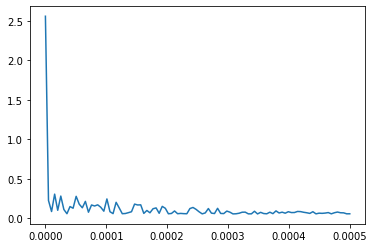

In [3]:
plt.plot(learning_rates, goodnesses)
plt.show()